# <center> Lecture 08-09: Ensemble Methods </center>

# <center> Lecture 08 - Bagging, Random Forest, and Boosting </center>

We have a classification problem of identifying the wine class label based on its chemical analysis of wine grown in the same region. 
We are going to use emsemble methods (Bagging, RandomForest, Boosting techniques, and stacking technique) to improve the model. 
You can visit here - https://archive.ics.uci.edu/ml/datasets/wine - for the details on data. 

In this work, we will first looking emsemble methods discussed in Lecture 08 using:
- Bagging and RandomForest
- Boosting: AdaBoost, Gradient Boost, and XGBoost

## 1. Load Data

In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
                    'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [3]:
y=df_wine['Class label']
X=df_wine.drop('Class label',axis=1)

In [4]:
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [5]:
df_wine.dtypes

Class label                       int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [6]:
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

<Figure size 1440x1440 with 0 Axes>

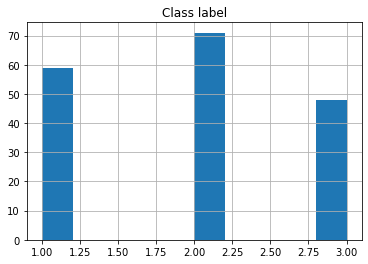

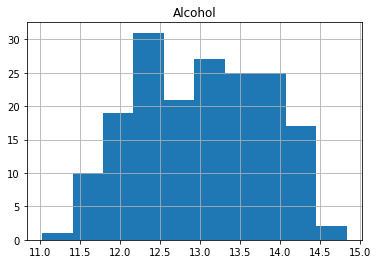

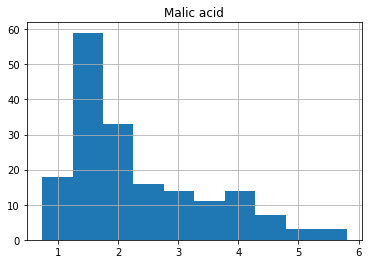

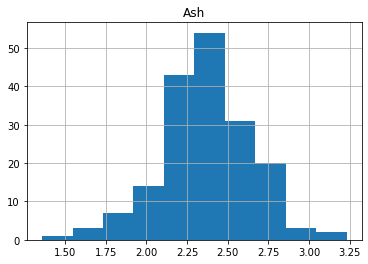

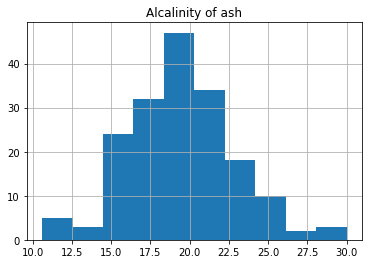

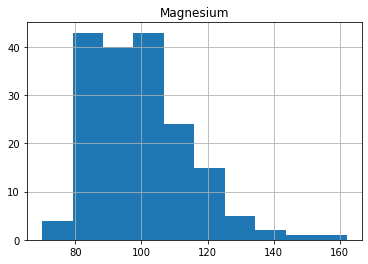

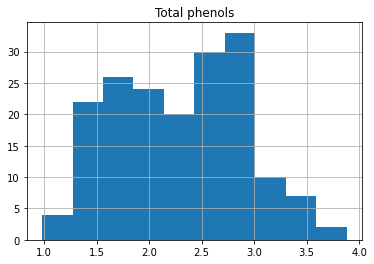

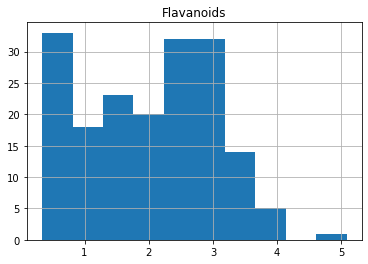

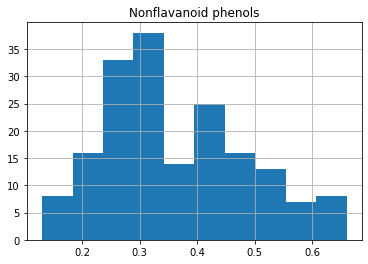

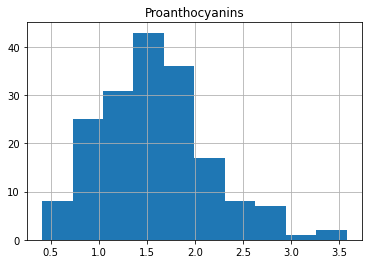

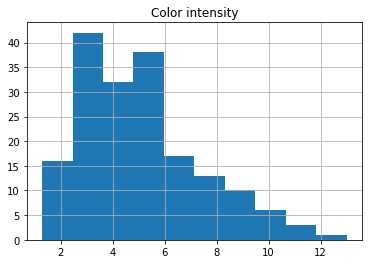

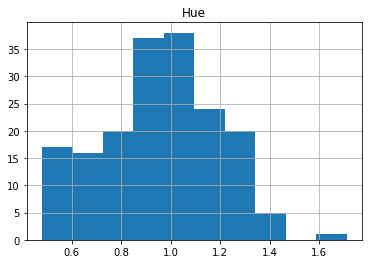

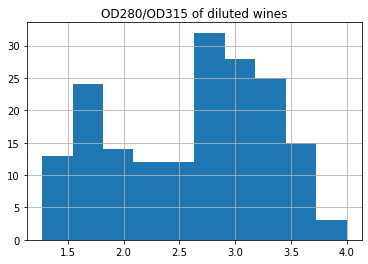

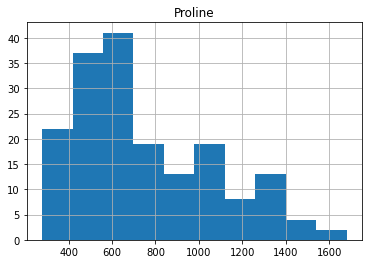

In [8]:
fig=plt.figure(figsize=(20,20))
features = list(df_wine.columns)
for col in df_wine.columns: 
    try:      
        df_wine[col] = pd.to_numeric(df_wine[col]) 
        df_wine.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

Here, some features are skewed. The link below shows the details of handling in cases. 
https://beingdatum.com/handling-skewness-in-machine-learning/

Note that I did not handle any skewness in this work. 

## 2. Modeling

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Note**
Jupyter notebook does not have XGBoost package installed and it needs to be installed. 

- For window: https://stackoverflow.com/questions/35510582/how-can-i-install-xgboost-package-in-python-on-windows
- For mac:https://machinelearningmastery.com/install-xgboost-python-macos/

- I made a Decisition Tree classifier to see the difference between DT and tree-based ensemable methods. 
- I did not consider overfit vs. underfit in this work. This should be handled in a real ML project. 

In [10]:
X = df_wine.drop('Class label',axis=1)
y = df_wine['Class label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)

In [12]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=None)
bag = BaggingClassifier(base_estimator=tree,n_estimators=500, bootstrap=True, bootstrap_features=True,
                        random_state=1)
RF = RandomForestClassifier(n_estimators=500,bootstrap=True,random_state=1,oob_score=True)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1,random_state=1)
grad = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,random_state=1)
xgb = XGBClassifier( learning_rate =0.1,n_estimators=1000,max_depth=None,min_child_weight=1,gamma=0,
 subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

Please visit the website for details on each model:

For Classifications:
- BaggingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
- RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- AdaBoostClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- GradientBoostingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- XGBClassifier: https://xgboost.readthedocs.io/en/latest/python/python_intro.html, https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

For regressions:
- BaggingRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
- RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- AdaBoostRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
- GradientBoostingRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

For GridSearchCV:
https://scikit-learn.org/stable/modules/grid_search.html
- When we do GridSearchCV to tune the hyperparameters, the procedure is same for all models:
    - provide the name of model
    - make an array of choices for hyperparameters of the model want to tune
    - give k value for cross validatation

### Decision Tree

In [13]:
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' %(tree_train,tree_test))

Decision tree train/test accuracies 1.000/0.889


### Bagging

In [14]:
bag = bag.fit(X_train,y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Decision bag train/test accuracies %.3f/%.3f' %(bag_train,bag_test))

Decision bag train/test accuracies 1.000/1.000


### Random Forest:
- The feature importance can be observed. 
- The out of bagging score can be estimated directly.

In [15]:
RF = RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
RF_train = accuracy_score(y_train, y_train_pred)
RF_test = accuracy_score(y_test, y_test_pred)
print('Decision RF train/test accuracies %.3f/%.3f' %(RF_train,RF_test))

Decision RF train/test accuracies 1.000/1.000


In [16]:
for name, importance in zip(X, RF.feature_importances_):
    print(name, "=", importance)

Alcohol = 0.14870143583928136
Malic acid = 0.03143440428379223
Ash = 0.00977699965115191
Alcalinity of ash = 0.027575535071669936
Magnesium = 0.02527649646647378
Total phenols = 0.07143511657466386
Flavanoids = 0.15304943463353518
Nonflavanoid phenols = 0.011264600617479997
Proanthocyanins = 0.020124375285300828
Color intensity = 0.14746697774893944
Hue = 0.07346175038430382
OD280/OD315 of diluted wines = 0.11537071249534513
Proline = 0.16506216094806264


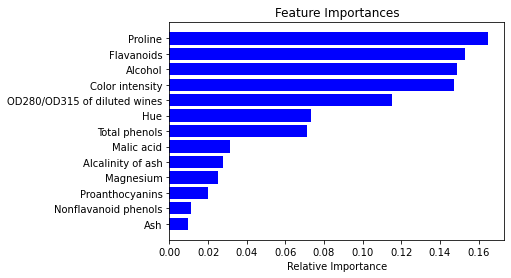

In [17]:
import numpy as np
import matplotlib.pyplot as plt
features = list(X.columns)
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
RF.oob_score_ #out of bag score

0.9788732394366197

### Bossting
#### Ada Boost

In [19]:
ada = ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Decision ada train/test accuracies %.3f/%.3f' %(ada_train,ada_test))

Decision ada train/test accuracies 1.000/0.889


### Gradient Boost

In [20]:
grad = grad.fit(X_train,y_train)
y_train_pred = grad.predict(X_train)
y_test_pred = grad.predict(X_test)
grad_train = accuracy_score(y_train, y_train_pred)
grad_test = accuracy_score(y_test, y_test_pred)
print('Decision grad train/test accuracies %.3f/%.3f' %(grad_train,grad_test))

Decision grad train/test accuracies 1.000/0.972


### XGBoost

In [21]:
xgb = xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
xgb_train = accuracy_score(y_train, y_train_pred)
xgb_test = accuracy_score(y_test, y_test_pred)
print('Decision xgb train/test accuracies %.3f/%.3f' %(xgb_train,xgb_test))

/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Decision xgb train/test accuracies 1.000/1.000


Make a visualization:
- For the quick run, I made the problem as a binary classification problem using two features. 

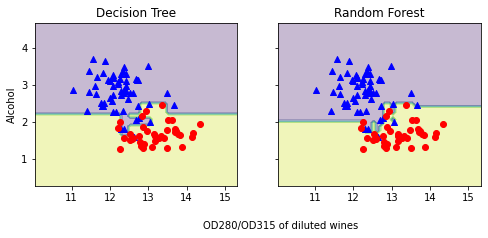

In [22]:
df_wine=df_wine[df_wine['Class label']!=1]
y=df_wine['Class label'].values
X=df_wine[['Alcohol','OD280/OD315 of diluted wines']].values
le=LabelEncoder()
y=le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)
x_min = X_train[:,0].min()-1
x_max = X_train[:,0].max()+1
y_min = X_train[:,1].min()-1
y_max = X_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),np.arange(y_min,y_max,0.1))
f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(8,3))
for idx, clf, tt in zip([0,1],[tree,RF],
                       ['Decision Tree','Random Forest']):
    clf.fit(X_train,y_train)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='red',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol')
plt.text(10.1,-0.8,s='OD280/OD315 of diluted wines',ha='center',va='center')
plt.show()

# <center> Lecture 09 - Stacking </center>

This file demonstrates the classification stacking ensemble method. The regression stacking can be in a similar manner but using regressors. 

The stacking using `sklearn` can be done as follow:
1. Have a train data set.
2. Train the base models. In this example, we use `Logistic regression`, `KNN`, `SVM`, and `DT`.
3. Build a meta model via `StackingClassifier`. Use `StackingRegressor` instead for a regressor. 

In [23]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

## 1. Train data
We create a binary classification data set (1000 by 20) using `make_classification`. 


In [24]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
                    'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [25]:
y=df_wine['Class label']
X=df_wine.drop('Class label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)

## 2. Base Models


In [26]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['DT'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    return models

In [27]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [28]:
models = get_models()

In [29]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.943 (0.070)
>knn 0.666 (0.119)
>DT 0.893 (0.084)
>svm 0.717 (0.117)


The train model with logistic regression is significantly better than other classifiers indicating that the data is a linear-data and therefore, it is not necessary to do staking. However, let's observe how stacking can improve the classification if we do not include the logistic regression. Any linear models can be used for level 1 mdoel. 

In level 1 model, I used logistic regression.

In [30]:
def get_stacking():
    # define the base models
    level0 = list()
    #level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('DT', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [31]:
def get_models():
    models = dict()
    #models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['DT'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['stacking'] = get_stacking()
    return models

In [32]:
models = get_models()

In [33]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn 0.710 (0.094)
>DT 0.879 (0.090)
>svm 0.687 (0.096)
>stacking 0.890 (0.089)


Note that the accuracy with stacking is better than KNN, DT, and SVM but still logistic regression resulted better. 

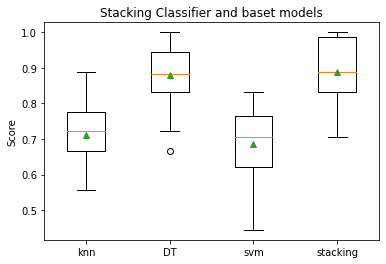

In [34]:
pyplot.figure(facecolor='white')
pyplot.boxplot(results, labels=names, showmeans=True)

pyplot.ylabel('Score')
pyplot.title('Stacking Classifier and baset models')
pyplot.show()

## 2. Prediction

In [35]:
model = get_stacking()
model.fit(X_test,y_test)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('DT', DecisionTreeClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [36]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.9444444444444444


In [38]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print('Accuracy',accuracy_score(y_train,LR.predict(X_train)))
print('Accuracy',accuracy_score(y_test,LR.predict(X_test)))

Accuracy 0.971830985915493
Accuracy 0.8888888888888888


/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
svc = SVC()
svc.fit(X_train,y_train)
print('Accuracy',accuracy_score(y_train,svc.predict(X_train)))
print('Accuracy',accuracy_score(y_test,svc.predict(X_test)))

Accuracy 0.7323943661971831
Accuracy 0.6111111111111112
